## 가입개월수
이전에 수행한 상관분석 결과, '이탈여부'는 '가입개월수'와 -0.4의 음의 상관관계를 보였다.  
시각화 결과에서도, 가입개월수가 증가할수록 이탈률이 감소하는 것을 볼 수 있었다.  
이는 '가입개월수'가 늘어날수록 이탈 가능성이 낮아진다는 것을 의미한다.  
따라서 가입개월수와 관련이 상관이 높은 변수를 찾아서, 이를 기반으로 맞춤형 프로모션을 진행한다면 이탈률을 낮출 수 있을 것으로 기대된다.

### 전체 변수들 중 분석해 볼 만한 가입개월수와 상관이 높은 변수 선정
- 계약기간유형 : 2년 > 1년 > 월 결제 순으로 가입개월수가 많을 것이다.
- 가입혜택, 부가서비스여부, 프리미엄기술지원여부 : 서비스/지원을 받고 있는 고객의 경우 서비스/지원에 만족했다면 가입개월수가 많을 것이다.
- 친구추천여부, 친구추천횟수 : 추천을 많이 했다면 본인 스스로도 오래 사용했을 것이므로, 가입개월수가 많을 것이다.
- 만족도 점수 : 만족도 점수가 높으면 가입개월수가 많을 것이다.

- 원래 데이터셋 상관분석 결과 가입개월수와 상관이 높은 변수
  : 배우자여부, 복수회선여부, 온라인보안서비스여부, 온라인백업서비스여부, 기기보호서비스여부, 기술지원서비스여부, TV스트리밍이용여부, 총요금
- 총요금에는 가입개월수가 계산되기 때문에 제하면 크게 배우자여부, 복수회선여부, 부가서비스여부로 볼 수 있다.
  각 변수들은 가입개월수와 모두 양의 상관관계를 가진다.
- 이는 배우자가 있을 때, 복수회선을 사용할 때, 부가서비스를 사용할 때 이탈 가능성이 높다는 것을 시사하기 때문에, 이러한 변수들에 맞춘 새로운 맞춤 프로모션을 적용하기에는 어렵다고 사료되어진다.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False


# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [7]:
data1 = pd.read_csv('data/tel_data.csv', index_col=0)

In [11]:
categorical_df = data1.select_dtypes(include='object')
categorical_df.drop(columns = '고객ID', inplace = True)
categorical_df = pd.get_dummies(categorical_df)
categorical_df['이탈여부'] = data1['이탈여부']
categorical_df['가입개월수'] = data1['가입개월수']
categorical_df

,인터넷서비스유형_DSL,인터넷서비스유형_False,인터넷서비스유형_Fiber optic,계약기간유형_Month-to-month,계약기간유형_One year,계약기간유형_Two year,결제방법_Bank transfer (automatic),결제방법_Credit card (automatic),결제방법_Electronic check,결제방법_Mailed check,이탈여부,가입개월수
0,True,False,False,True,False,False,False,False,True,False,False,1
1,True,False,False,False,True,False,False,False,False,True,False,34
2,True,False,False,True,False,False,False,False,False,True,True,2
3,True,False,False,False,True,False,True,False,False,False,False,45
4,False,False,True,True,False,False,False,False,True,False,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,True,False,False,False,True,False,False,False,False,True,False,24
7039,False,False,True,False,True,False,False,True,False,False,False,72
7040,True,False,False,True,False,False,False,False,True,False,False,11
7041,False,False,True,True,False,False,False,False,False,True,True,4


In [12]:
correlation_matrix = categorical_df.corr()
print(correlation_matrix)

                                인터넷서비스유형_DSL  인터넷서비스유형_False  \
인터넷서비스유형_DSL                        1.000000       -0.380635   
인터넷서비스유형_False                     -0.380635        1.000000   
인터넷서비스유형_Fiber optic               -0.640987       -0.465793   
계약기간유형_Month-to-month              -0.065509       -0.218639   
계약기간유형_One year                     0.046795        0.038004   
계약기간유형_Two year                     0.031714        0.218278   
결제방법_Bank transfer (automatic)      0.025476       -0.002113   
결제방법_Credit card (automatic)        0.051438        0.001030   
결제방법_Electronic check              -0.104418       -0.284917   
결제방법_Mailed check                   0.041899        0.321361   
이탈여부                               -0.124214       -0.227890   
가입개월수                               0.013274       -0.039062   

                                인터넷서비스유형_Fiber optic  계약기간유형_Month-to-month  \
인터넷서비스유형_DSL                               -0.640987              -0.065509   
인터넷서비스유형_

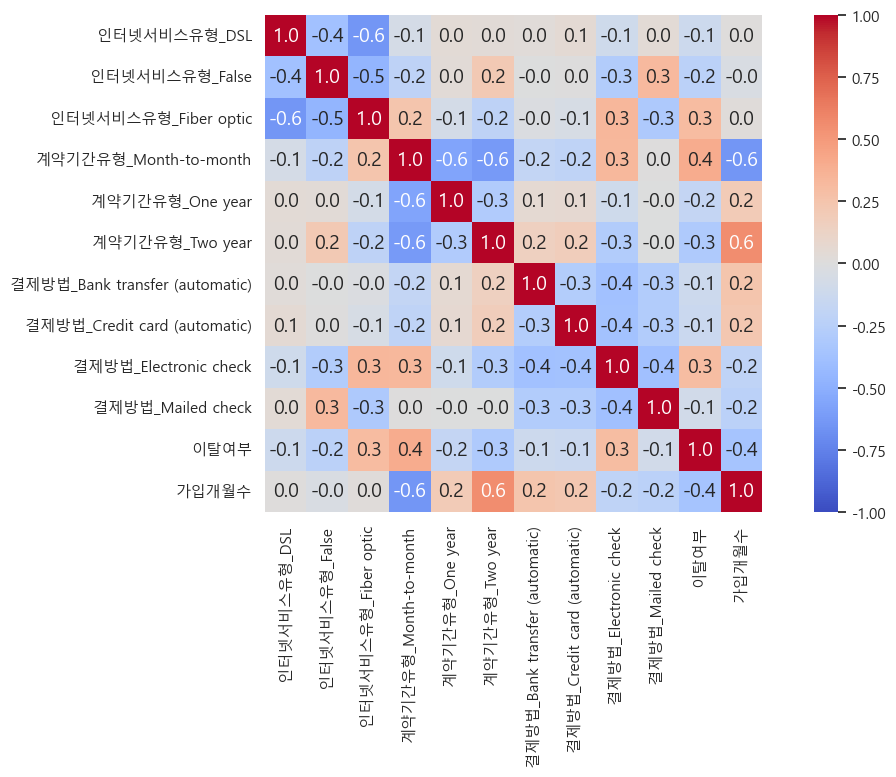

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True, vmin=-1, vmax=1)
plt.tight_layout()
plt.show()

- 계약기간유형_Month-to-month와 가입개월수는 -0.6,
- 계약기간유형_Two_year과 가입개월수는 0.6의 상관관계를 갖는 것으로 나타났다.
- 이탈여부와도 직접적으로 각각 0.4, -0.3의 상관관계를 보이므로, 계약기간유형에서 Month-to-month 방식을 감소시키고, Two year 방식을 증가시킨다면 최종적으로는 이탈 가능성이 줄어들 것이다.